In [ ]:
"""
This notebook has study notes, utilities and examplar code
for work with geopandas and GeoDataFrames.
"""

In [1]:
import psutil
print('CPU %:\t',      psutil.cpu_percent(4))
print('Mem total:\t',  psutil.virtual_memory()[0])
print('Mem avail:\t',  psutil.virtual_memory()[1])
print('Mem %:\t',      psutil.virtual_memory()[2])
print('Mem used:\t',   psutil.virtual_memory()[3])
print('Mem free:\t',   psutil.virtual_memory()[4])


CPU %:	 8.7
Mem total:	 17008730112
Mem avail:	 12418547712
Mem %:	 27.0
Mem used:	 4590178304
Mem free:	 12418547712


In [ ]:
# Plotting
1. You should be able to take a geopandas dataframe and append the plot() method
2. 
    import matplotlib as plt
    fig, ax = plt.subplots()    # initializes the image
    area1 = (ax=ax, color="red", edgecolor="pink")
    area2 = (ax=ax, color="blue", edgecolor="yellow")  # color = none  allows you to see overlaid
    
    intersection = gpd.overlay(area1, area2, how='intersection')
    union = gpd.overlay(area1, area2, how='union')
        # a union operation will give three polygons in this case - area1 wo area2, intersection, area2 wo area1
    symdiff = gpd.overlay(area1, area2, how='symmetric_difference')  # union minus the intersection
    diff = gpd.overlay(area1, area2, how='difference')  # area1 minus area2

    # dissolve -- take a gpd and summarize up from lower level,  eg summarize precincts to counties
        state_elections has precincts within counties with a field called COUNTY
        state_election.dissolve(by='COUNTY')

    # buffer  -  add space around a line or point
    river.buffer(distance = 500).plot()   adds 500 meters on each side of a line geom for river
    
    https://www.youtube.com/watch?v=HtYxzt55-1w

C:\Users\micha\anaconda3\lib\site-packages\geoplot\geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

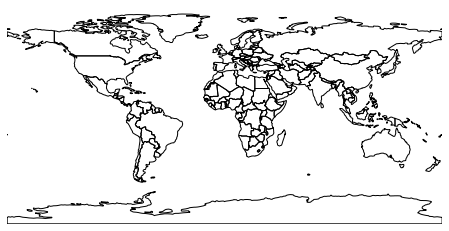

In [7]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
geoplot.polyplot(world, figsize=(8, 4))

In [ ]:
# Spatial joins
plantswithinstates = gpd.sjoin(powerplants,states, 
                               how='inner',          #  or 'left', or right, outer, etc
                               predicate='within'    #  'contains', default ‘intersects’
                                                     #  use df.sindex.valid_query_predicates to find valid ops
                                                     # 'contains', 'contains_properly', 'covers', 'crosses',
                                                     # 'intersects','overlaps', 'touches', 'within'
                              )
# The join requires that each df has the same coordinate reference system CRS
states.to_crs( powerplants.crs, inplace=True)

If you're going to use distances explicitly, you should recast the CRS to use a 'projected' version.
states.to_crs(epsg = 1234)

<AxesSubplot:>

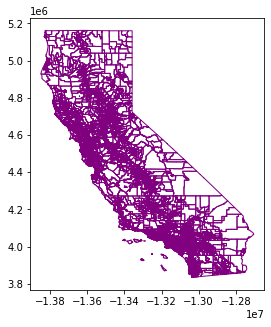

In [6]:
california = gpd.read_file(
  "D:/Open Environments/data/electionscience/ca_2020/ca_2020.shp")
california.plot(figsize=(5,5), edgecolor="purple", facecolor="None")
dir(california)
california.crs
california.type
california.bounds
california.columns

%matplotlib inline
california.plot()

In [1]:
import psycopg2 as pg
import os

# replace with whatever query is appropriate
query = "select * from core.page"

connectionstring = \
    "host='" + os.environ.get("OEhost") + "' " + \
    "port='" + os.environ.get("OEport") + "' " + \
    "dbname='" + os.environ.get("OEdatabase") + "' " + \
    "user='" + os.environ.get("OEuser") + "' " + \
    "password='" + os.environ.get("OEpassword") + "'"

connection = pg.connect(connectionstring)
cursor = connection.cursor()
cursor.execute(query)
df = cursor.fetchall()

[('about.php', 'Open Environments - About Us'),
 ('cart.php', 'Open Environments - Shopping Cart'),
 ('contact.php', 'Open Environments - Contact Us'),
 ('cookies-policy.php', 'Open Environments - Cookies Policy'),
 ('help.php', 'Open Environments - Help'),
 ('index.php', 'Open Environments'),
 ('models.php', 'Open Environments - Models'),
 ('notifications.php', 'Open Environments - Notifications'),
 ('privacy-policy.php', 'Open Environments - Privacy Policy'),
 ('profile.php', 'Open Environments - Profile'),
 ('publications.php', 'Open Environments - Publications'),
 ('publishers.php', 'Open Environments - Publishers'),
 ('settings.php', 'Open Environments - Settings'),
 ('subjects.php', 'Open Environments - Subjects'),
 ('terms.php', 'Open Environments - Terms of Service')]

In [2]:
#  Load the NIST geocodes, downloaded from Census Bureau
import os
import pandas as pd
import sqlalchemy as sql

fips = pd.read_csv("Documents/all-geocodes-v2019.csv")
engine = sql.create_engine("postgresql://" +
                       os.environ.get("OEuser") +
                       ":" + os.environ.get("OEpassword") +
                       "@" + os.environ.get("OEhost") +
                       ":" + os.environ.get("OEport") +
                       "/" + os.environ.get("OEdatabase"))
fips.to_sql("geocodes_2019", engine, schema="nist", if_exists='replace', index=False,
          index_label=None, chunksize=None, dtype=None, method=None)

OperationalError: (psycopg2.OperationalError) connection to server at "yogi" (192.168.1.208), port 5432 failed: Connection timed out (0x0000274C/10060)
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [2]:
#  Load the US "possessions", a superset of states and abbreviations

import os
import pandas as pd
import sqlalchemy as sql

states = pd.read_csv("D:/Open Environments/data/usps/states.csv")
engine = sql.create_engine("postgresql://" +
                       os.environ.get("OEuser") +
                       ":" + os.environ.get("OEpassword") +
                       "@" + os.environ.get("OEhost") +
                       ":" + os.environ.get("OEport") +
                       "/" + os.environ.get("OEdatabase"))
states.to_sql("states", engine, schema="usps", if_exists='replace', index=False,
          index_label=None, chunksize=None, dtype=None, method=None)

In [41]:
# unzip the voting data into folders
# only needs to be done once

from zipfile import ZipFile

for state in states["Abbreviation"]:
    # read the voting data into a dataframe
    try:
        with ZipFile("D:/Open Environments/data/electionscience/dataverse_files/" + state.lower() + "_2020.zip", 'r') as Z:
           Z.extractall("D:/Open Environments/data/electionscience/dataverse_files/" + state.lower() + "_2020")
    except:
        print("Missing ",states[states.Abbreviation == state])

Missing         Possession Abbreviation
2  American Samoa           AS
Missing                          Possession Abbreviation
10  Federated States of Micronesia           FM
Missing     Possession Abbreviation
13       Guam           GU
Missing     Possession Abbreviation
20   Kentucky           KY
Missing            Possession Abbreviation
23  Marshall Islands           MH
Missing                    Possession Abbreviation
39  Northern Mariana Islands           MP
Missing     Possession Abbreviation
43      Palau           PW
Missing       Possession Abbreviation
45  Puerto Rico           PR
Missing        Possession Abbreviation
48  South Dakota           SD
Missing          Possession Abbreviation
53  Virgin Islands           VI
Missing         Possession Abbreviation
56  West Virginia           WV


In [84]:
# Intersection test.
# For each state, for each county find all intersections

missing = states[states.Abbreviation == "XX"]  # brute force way to make a blank state list

for state in states["Abbreviation"]:
    try:
        "D:/Open Environments/data/electionscience/dataverse_files/" \
            + state.lower() + "_2020/" + state.lower() + "_2020.shp")
    
        for c in state_election[county_field[state]]unique():
#    print(c, ":", state_election[state_election["COUNTY"]==c].shape[0])

    except:  # try state
        missing = missing.append(states[states.Abbreviation == state])

print("Missing:",missing)



def overlaps(gdf, threshold):
    """
    This function accepts a geographic data frame and tests each of its rows for overlap with any other rows.
    Args:
        gdf (int): a GeoDataFrame object.
        threshold (float):  A threshold area size below which any overlap should be considered immaterial.

    Returns:
        geo_overlaps: a GeoDataFrame with 
            indexes of the 2 overlapping rows
            geometry of the overlapping area
    """
    
    geo_overlaps=gpd.GeoDataFrame(crs=gdf.crs)

    for index, row in gdf.iterrows():
        gdf1 = gdf.loc[gdf.id!=row.id,]
        overlaps=gdf1[gdf1.geometry.overlaps(row.geometry)]['id'].tolist()
        if len(overlaps)>0:
            temp_list=[]
            # compare the area with threshold
            for y in overlaps:
                temp_area = gpd.overlay(gdf.loc[gdf.id==y,],gdf.loc[gdf.id==row.id,],how='intersection')
                temp_area = temp_area.loc[temp_area.geometry.area >= threshold]
                if temp_area.shape[0]>0:
                    geo_overlaps=gpd.GeoDataFrame(pd.concat([temp_area,geo_overlaps],ignore_index=True),crs=gdf.crs)
    geo_overlaps['sorted']=geo_overlaps.apply(lambda y: sorted([y['id_1'],y['id_2']]),axis=1)
    geo_overlaps['sorted']=geo_overlaps.sorted.apply(lambda y: ''.join(y))
    geo_overlaps=geo_overlaps.drop_duplicates('sorted')
    geo_overlaps=geo_overlaps.reset_index()[['id_1','id_2','geometry']]
    return(geo_overlaps)


72

In [9]:
# Here is the Census dataset with shapes at a block group level
#     incudes 103 estimate columns with a corresponding margin of error for each 
census = gpd.read_file("D:/Open Environments/data/census/tiger/ACS_2019_5YR_BG_01/ACS_2019_5YR_BG_01_ALABAMA.gdb", 
                      # driver='FileGDB', layer=0
                      )
# census.loc[census['GEOID'].str[7:12] == "12011"].boundary.plot(figsize=(8, 4))
# State 12 = Florida    County 11 = Broward  County   around Fort Lauderdale
#  THE GEOMETRY COLUMN IS FILLED WITH NONE VALUES !
census.geometry


In [22]:
census = gpd.read_file("D:/Open Environments/data/census/tiger/ACS_2019_5YR_STATE.gdb/ACS_2019_5YR_STATE.gdb" 
                      # driver='FileGDB', layer=0
                      )

In [23]:
import fiona
fiona.listlayers("D:/Open Environments/data/census/tiger/ACS_2019_5YR_STATE.gdb/ACS_2019_5YR_STATE.gdb")

['X01_AGE_AND_SEX',
 'X02_RACE',
 'X03_HISPANIC_OR_LATINO_ORIGIN',
 'X04_ANCESTRY',
 'X05_FOREIGN_BORN_CITIZENSHIP',
 'X06_PLACE_OF_BIRTH',
 'X07_MIGRATION',
 'X08_COMMUTING',
 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
 'X10_GRANDPARENTS_GRANDCHILDREN',
 'X11_HOUSEHOLD_FAMILY_SUBFAMILIES',
 'X12_MARITAL_STATUS_AND_HISTORY',
 'X13_FERTILITY',
 'X14_SCHOOL_ENROLLMENT',
 'X15_EDUCATIONAL_ATTAINMENT',
 'X16_LANGUAGE_SPOKEN_AT_HOME',
 'X17_POVERTY',
 'X18_DISABILITY',
 'X19_INCOME',
 'X20_EARNINGS',
 'X21_VETERAN_STATUS',
 'X22_FOOD_STAMPS',
 'X23_EMPLOYMENT_STATUS',
 'X25_HOUSING_CHARACTERISTICS',
 'X27_HEALTH_INSURANCE',
 'X28_COMPUTER_AND_INTERNET_USE',
 'X29_VOTING_AGE_POPULATION',
 'X98_UNWEIGHTED_HOUSING_UNIT_SAMPLE',
 'X99_IMPUTATION',
 'X24_INDUSTRY_OCCUPATION',
 'X26_GROUP_QUARTERS',
 'STATE_METADATA_2019',
 'ACS_2019_5YR_STATE']

DriverError: 'D:\Open Environments\data\census	iger\ACS_2019_5YR_STATE.gdb\ACS_2019_5YR_STATE.gdb' does not exist in the file system, and is not recognized as a supported dataset name.

In [20]:
census.loc[census['GEOID'].str[7:12] == "12011"]["geometry"]

41262    None
41263    None
41264    None
41265    None
41266    None
         ... 
42197    None
42198    None
42199    None
42200    None
42201    None
Name: geometry, Length: 940, dtype: geometry

In [48]:
def overlap_test(gdf, threshold):
    """
    In geographic analytics, we're often assume that areas dont overlap.
    One would expect a GeoDataFrame of nations, states or counties for example should not have geometries 
    that intersect with each other.  
    
    This function tests the non-overlapping assumption by accepting a geographic data frame, comparing each
    row to each other to collect any intersection geometries.
    
    Args:
        gdf (int): a GeoDataFrame object.
        threshold (float):  A threshold area size below which any overlap should be considered immaterial.

    Returns:
        geo_overlaps: a GeoDataFrame with 
            indexes of the 2 overlapping rows
            geometry of the overlapping area
    """
    print("Starting")
    gdf_rotating = gdf
    for index,row in gdf.iterrows(): 
        print("Testing row",index)
        if index < gdf.shape[0]-1:
            gdf_rotating = pd.concat( \
                                     [gdf_rotating.iloc[[gdf_rotating.shape[0]-1],:], 
                                      gdf_rotating.drop(gdf_rotating.shape[0]-1, 
                                      axis=0)], axis=0, ignore_index=True)
            o = gpd.overlay(gdf['geometry'], gdf_rotating['geometry'], how='intersection')
        
        
        for index2,row2 in gdf.iterrows(): 
            if index2 > 4: continue
            if index1 == index2: continue   # Dont test overlap with oneself
            o = gpd.overlay(row1['geometry'], row2['geometry'], how='intersection')
            print(o.area)
    return(geo_overlaps)


In [56]:
gdf_rotating = gdf
for index,row in gdf.iterrows(): 
    print("Testing row",index)
    if index == 0: continue    # dont compare to self
    gdf_rotating = pd.concat( \
                             [df_rotating.iloc[[df_rotating.shape[0]-1],:], 
                              df_rotating.drop(df_rotating.shape[0]-1, 
                              axis=0)], axis=0, ignore_index=True)
    o = gpd.overlay(gdf['geometry'], gdf_rotating['geometry'], how='intersection'. keep_geom_type=False)

In [124]:
gdf_rotating = gdf
gdf_rotating = pd.concat( \
                         [gdf_rotating.iloc[[gdf_rotating.shape[0]-1],:], 
                          gdf_rotating.drop(gdf_rotating.shape[0]-1, 
                          axis=0)], axis=0, ignore_index=True)
p = gpd.overlay(gdf, gdf, how='intersection', keep_geom_type=False)

In [125]:
p.shape

(3054, 43)

In [130]:
p = gpd.overlay(gdf['geometry'], gdf_rotating['geometry'], how='intersection', keep_geom_type=False)

NotImplementedError: overlay currently only implemented for GeoDataFrames

In [129]:
p.shape

(3054, 43)

In [121]:
o.shape

(3054, 43)

In [122]:
gdf.shape

(434, 22)

In [123]:
gdf_rotating.shape

(434, 22)

In [111]:
type(o)

geopandas.geodataframe.GeoDataFrame

In [108]:
type(gdf_rotating)

geopandas.geodataframe.GeoDataFrame

In [118]:
gdf[gdf.geom_type != "Polygon"].shape

(0, 22)

In [113]:
for index,row in gdf.iterrows():
    print(row.geom_type)

AttributeError: 'Series' object has no attribute 'geom_type'

In [132]:
from shapely.geometry import Polygon
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1_data':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2_data':[1,2]})



<AxesSubplot:>

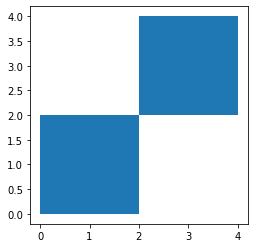

In [135]:
df1.plot()

<AxesSubplot:>

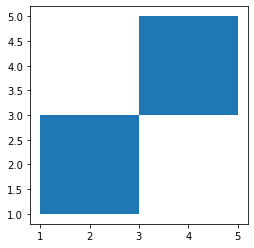

In [136]:
df2.plot()

<AxesSubplot:>

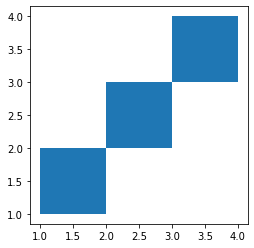

In [137]:
gpd.overlay(df1, df2, how='intersection').plot()

In [ ]:
precincts = gpd.read_file( \
            "D:/Open Environments/data/electionscience/dataverse_files/mi_2020/mi_2020.shp")
precincts = precincts.to_crs("EPSG:3395")

bgshapes = gpd.read_file("D:/Open Environments/data/census/tiger/tl_2020_26_bg" )
bgshapes = bgshapes.to_crs("EPSG:3395")

bgpop = gpd.read_file("D:/Open Environments/data/census/tiger/2010_ACS_5YR_BG_26.gdb/2010_ACS_5YR_BG_26_MICHIGAN.gdb/")
bgpop = bgpop.to_crs("EPSG:3395")

blockgroups = bgpop[bgpop.COUNTYFP10 == '115']


In [ ]:
fig, ax = plt.subplots(figsize = (20,16)) 
monroebg.plot(ax=ax,edgecolor = 'yellow')
monroepre.geometry.boundary.plot(color=None,edgecolor='white',linewidth = 2,ax=ax) #Use your second dataframe

In [ ]:
monroebg[monroebg.GEOID == '261158329002'].plot()  # state=26,county=115,tract=832900 and block group 2 
# see this block group on the west side, middle of the county

In [ ]:
monroebg = blockgroups.where(blockgroups.COUNTYFP == '115')
monroepre = precincts.where(precincts.COUNTYFIPS == '115')

In [ ]:
monroepre.plot(edgecolor='yellow')

In [ ]:
monroebg.plot(edgecolor='white')

In [14]:
import os
import glob
import pandas as pd

datapath = "Documents/"

csvlist = []

for filename in glob.glob(datapath + "/*.csv"):
    csvlist.append(pd.read_csv(filename, index_col=None, header=0))

frame = pd.concat(csvlist, axis=0, ignore_index=True)

In [15]:
frame.shape

(222, 9)

In [16]:
frame.head()

,Unnamed: 0,GEOID,REP,DEM,LIB,OTH,area,gap,precincts
0,0,10950307022,375.715762,59.651634,5.389292,1.559360,3.125119e+07,4.097819e-08,3
1,1,10950309043,700.641853,126.968391,8.634522,1.632735,3.131836e+07,-4.470348e-08,3
2,2,10950310022,498.986603,81.582288,2.634396,0.000600,5.119444e+07,8.129965e+01,4
3,3,10950306021,31.713569,8.301094,0.516701,0.135528,2.532384e+06,9.313226e-10,1
4,4,10950305021,618.935145,95.678344,9.202230,0.520174,2.669381e+07,1.527369e-07,4
